In [467]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
from sklearn import datasets

# 데이터셋 준비

In [468]:
iris = datasets.load_iris()

In [469]:
iris.target[np.where(iris.target != 2)] = 1
target = abs(iris.target - 1)
data = iris.data

# 로지스틱 회귀 알고리즘

In [470]:
def logit(data,params,target):
    # 각 데이터 포인트와 파라미터를 곱해서, 각 행을 기준으로 더한 n * 1의 열벡터를 생성한다.
    param_dot_data = np.sum(data*params,axis=1)
    # 이 n*1의 열벡터를 로지스틱 방정식에 통과시킨다
    logistic = 1/(1+np.exp(-param_dot_data))
    # 각 데이터 포인트의 예측값과, 참값 target간의 차이를 구한다.
    mse = logistic - target
    return(mse,logistic)

In [471]:
def gradient_descent(learning_rate,params,mse,data):
    # 차이(mse)를 그냥 사용하면 차원이 맞지 않아 에러가 발생한다. (150,)차원의 데이터셋을 (150,1) 차원으로 변경해준다.
    mse = mse.reshape(150,1)
    # 차이(mse)와 데이터포인트(data)를 곱한 후, 각 열을 기준으로 더한 1*m의 행벡터를 생성한다
    term_1 = np.sum((mse*data),axis=0)
    # 이를 총 샘플수로 나누어 표준화 해준다
    deriv_cost_function = term_1/np.shape(data)[0]
    # 경사하강법을 사용한다. 로지스틱 비용함수는 볼록함수(convex)로서 전역 최솟값을 항상 보장한다.
    params = params - learning_rate * deriv_cost_function
    return(params)

In [472]:
def scoring(logistic,target):
    # target이 1일 경우 이 항이 활성화된다. 
    if_1 = target*np.log(logistic)
    # target이 0일 경우 이 항이 활성화된다
    if_0 = (1-target)*np.log(1-logistic)
    # 모든 데이터 샘플의 cost를 총합한 후, 이를 샘플수로 나누어 평균 손실(로그 손실)함수를 구한다.
    score = -(np.sum(if_1+if_0))/np.shape(data)[0]
    return(score)

In [473]:
def logistic_regression(data,target,iter,learning_rate):
    result = dict()
    score_array = np.array(np.nan)
    # 임의의 랜덤 파라미터를 생성한다.
    params = np.random.randn(np.shape(data)[0],np.shape(data)[1])
    for i in range(0,iter):
        # 앞서 정의한 logit함수에서 차이(mse)와 로지스틱 방정식을 통과시킨 logit값을 출력한다
        mse,logit_result = logit(data,params,target)
        # 경사하강법을 1회 실시한 파라미터를 출력한다
        params = gradient_descent(learning_rate,params,mse,data)
        # 한편, logit함수에서 출력된 logit_result를 넘겨받아 현재의 비용을 계산한다
        score = scoring(logit_result,target)
        # 손실함수의 score값을 누적하여 array에 저장한다.
        score_array = np.append(score_array,score)
        print(score)
        # 비용함수가 "nan"으로 출력되면 iter를 중단한다
        if str(score) == "nan":
            break
    result["params"] = params
    result["mse"] = mse
    result["logit_result"] = logit_result
    result["score_array"] = score_array
    
    return(result)

# 테스트

In [ ]:
test = logistic_regression(data,target,1000,0.5)

In [ ]:
test["params"]

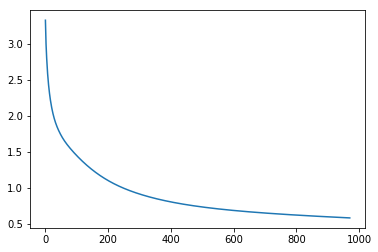

In [475]:
plt.plot(test["score_array"])